#### **Importing the Library**

In [1]:
!pip install top2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# The basic library for data analysis and visulaization
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
SOME_FIXED_SEED = 42
np.random.seed(SOME_FIXED_SEED)

In [3]:
# Sklearn Library
from sklearn.model_selection import train_test_split

In [4]:
# Library for natural language processing and topic modelling 
from top2vec import Top2Vec # pip install top2vec

In [5]:
#nltk 
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus.reader import wordnet
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
stop_words = list(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### **Loading the Data**

In [6]:
# loading the feature engineering data from the top level feature extraction.
user_profile_df = pd.read_pickle("/content/drive/MyDrive/BrainStation/user_profile_df.pkl")
user_profile_df.head()

,user_name,text_document,avg_word_count_per_week,total_tw_morning,total_twt_afternoon,total_twt_evening,total_twt_night,avg_emoji_wordcount_ratio,avg_usertag_wordcount_ratio,avg_hashtag_wordcount_ratio,twt_profanity_score,twt_polarity_score,emoji_polarity_score
0,pretagil,pronta para o womensmusicevent styling marcell...,14.000000,0,0,1,0,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000
1,mirzasania,it took seconds to watch this in that time ano...,17.564706,46,37,10,15,0.148067,0.070451,0.080767,0.008658,0.231919,-0.031254
2,parishilton,totally fan girling despite having met many we...,52.633333,28,12,26,46,0.222708,0.298165,0.077463,0.005450,0.312687,-0.030072
3,piersmorgan,rt icymi catch up with this week s episodes of...,66.821429,20,44,43,3,0.064941,0.058175,0.014338,0.006810,0.159579,-0.004014
4,timtebow,thank you accomplish the mission that you have...,24.500000,3,50,40,24,0.008909,0.092427,0.063165,0.036580,0.255472,0.000000


In [7]:
# Define function for tokenize and lemmatizing
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

In [8]:
# removing the stop word , lemmatization of text document 
def docs_preprocessor(doc):
    tokenizer = RegexpTokenizer(r'\w+')
    docs = tokenizer.tokenize(doc)  # Split into words.
    # Remove words that are only one character.
    docs = [token for token in docs if len(token) > 3]
    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [lemmatizer.lemmatize(token) for token in docs]
    docs= " ".join(docs)
    return docs

In [9]:
# Extracting the text data from the dataframe
user_profile_df["lemmatized_texts"] = user_profile_df["text_document"].map(lambda x: docs_preprocessor(x))


In [10]:
# Saving the data for futher analysis
with open('/content/drive/MyDrive/BrainStation/df_tweet_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(user_profile_df, file)


#### **Topic Modelling using Top2Vec library**

In [11]:
# Converting the text Data into list of documents
documents_train=user_profile_df["lemmatized_texts"].tolist()

# Creating the list of docId
docs_id =user_profile_df["user_name"].tolist()


In [12]:
# Model to identify the topic based on the corpus
model= Top2Vec(documents=documents_train,
               document_ids=docs_id,
               min_count=50,
               speed="deep-learn",
               verbose=1,
               workers=8)

2022-08-06 22:17:40,336 - top2vec - INFO - Pre-processing documents for training
2022-08-06 22:17:42,064 - top2vec - INFO - Creating joint document/word embedding
2022-08-06 22:20:57,008 - top2vec - INFO - Creating lower dimension embedding of documents
2022-08-06 22:21:07,713 - top2vec - INFO - Finding dense areas of documents
2022-08-06 22:21:07,743 - top2vec - INFO - Finding topics


#####**Exploring the topics and the vocabulary**

In [13]:
# Exploring the number of topic for model_1 found  in the data set 
num_topcis = model.get_num_topics()
print(f"Total number of topics to explain the corpus :{num_topcis}")


Total number of topics to explain the corpus :5


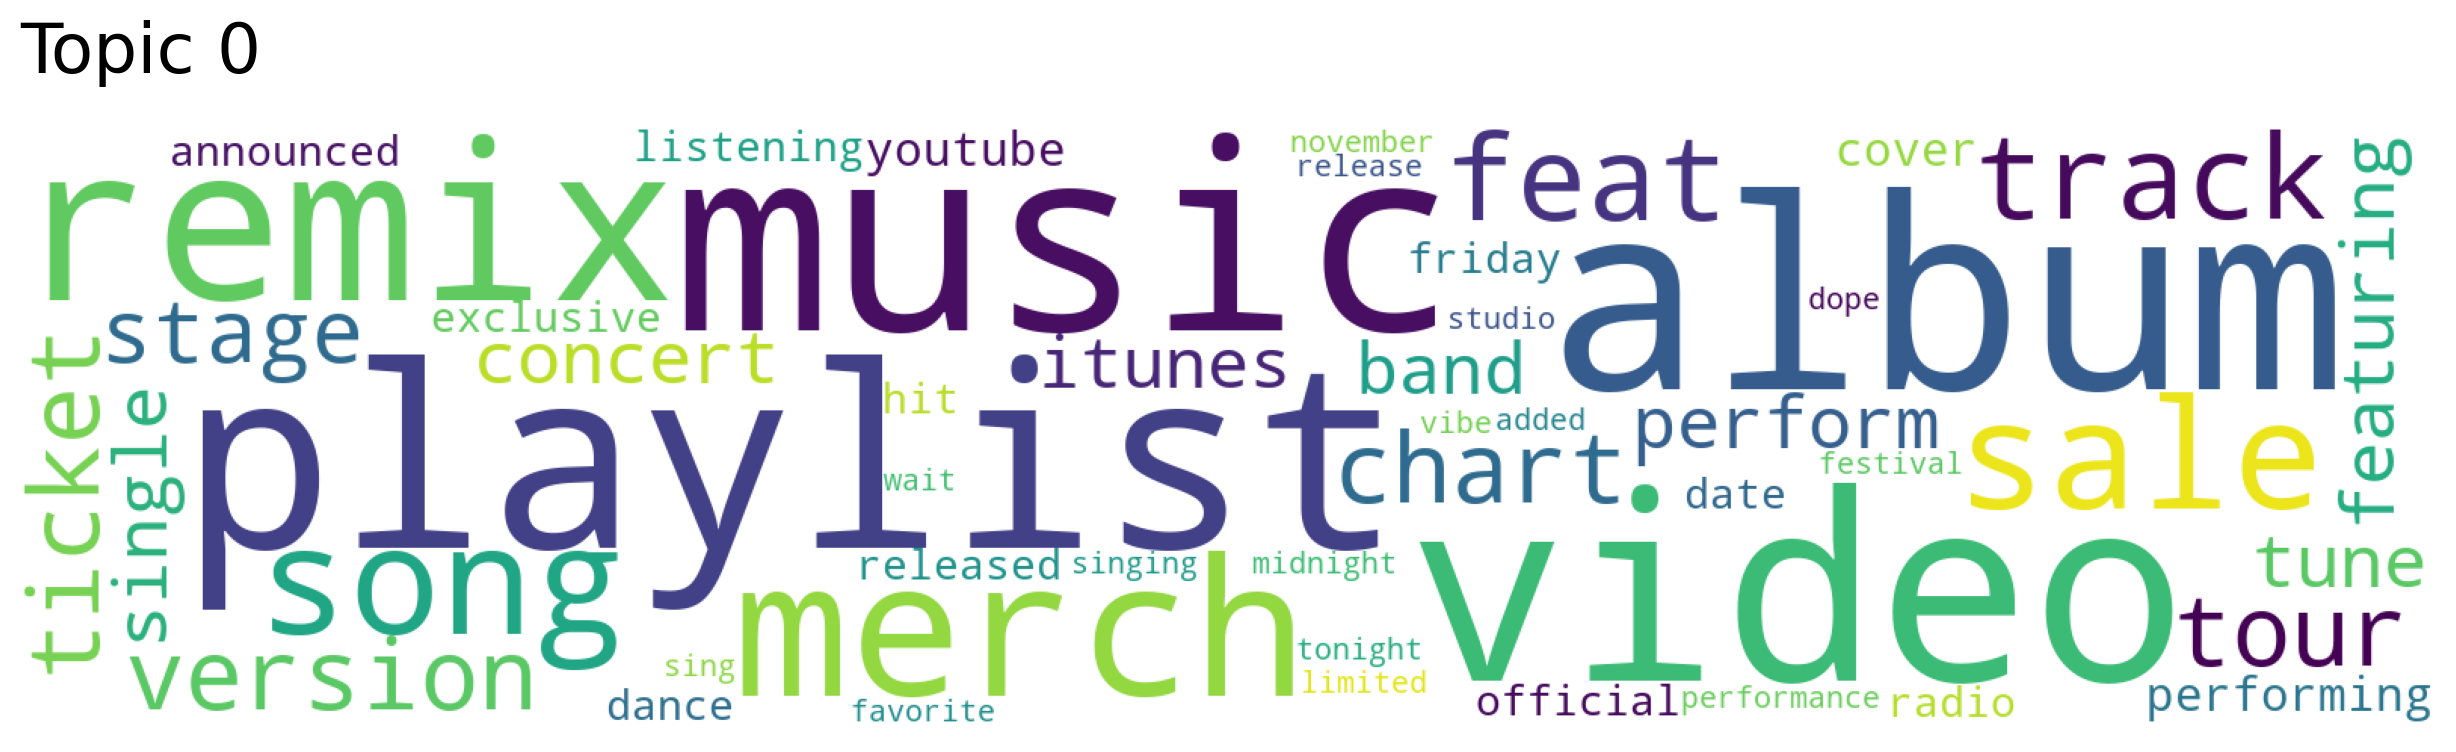

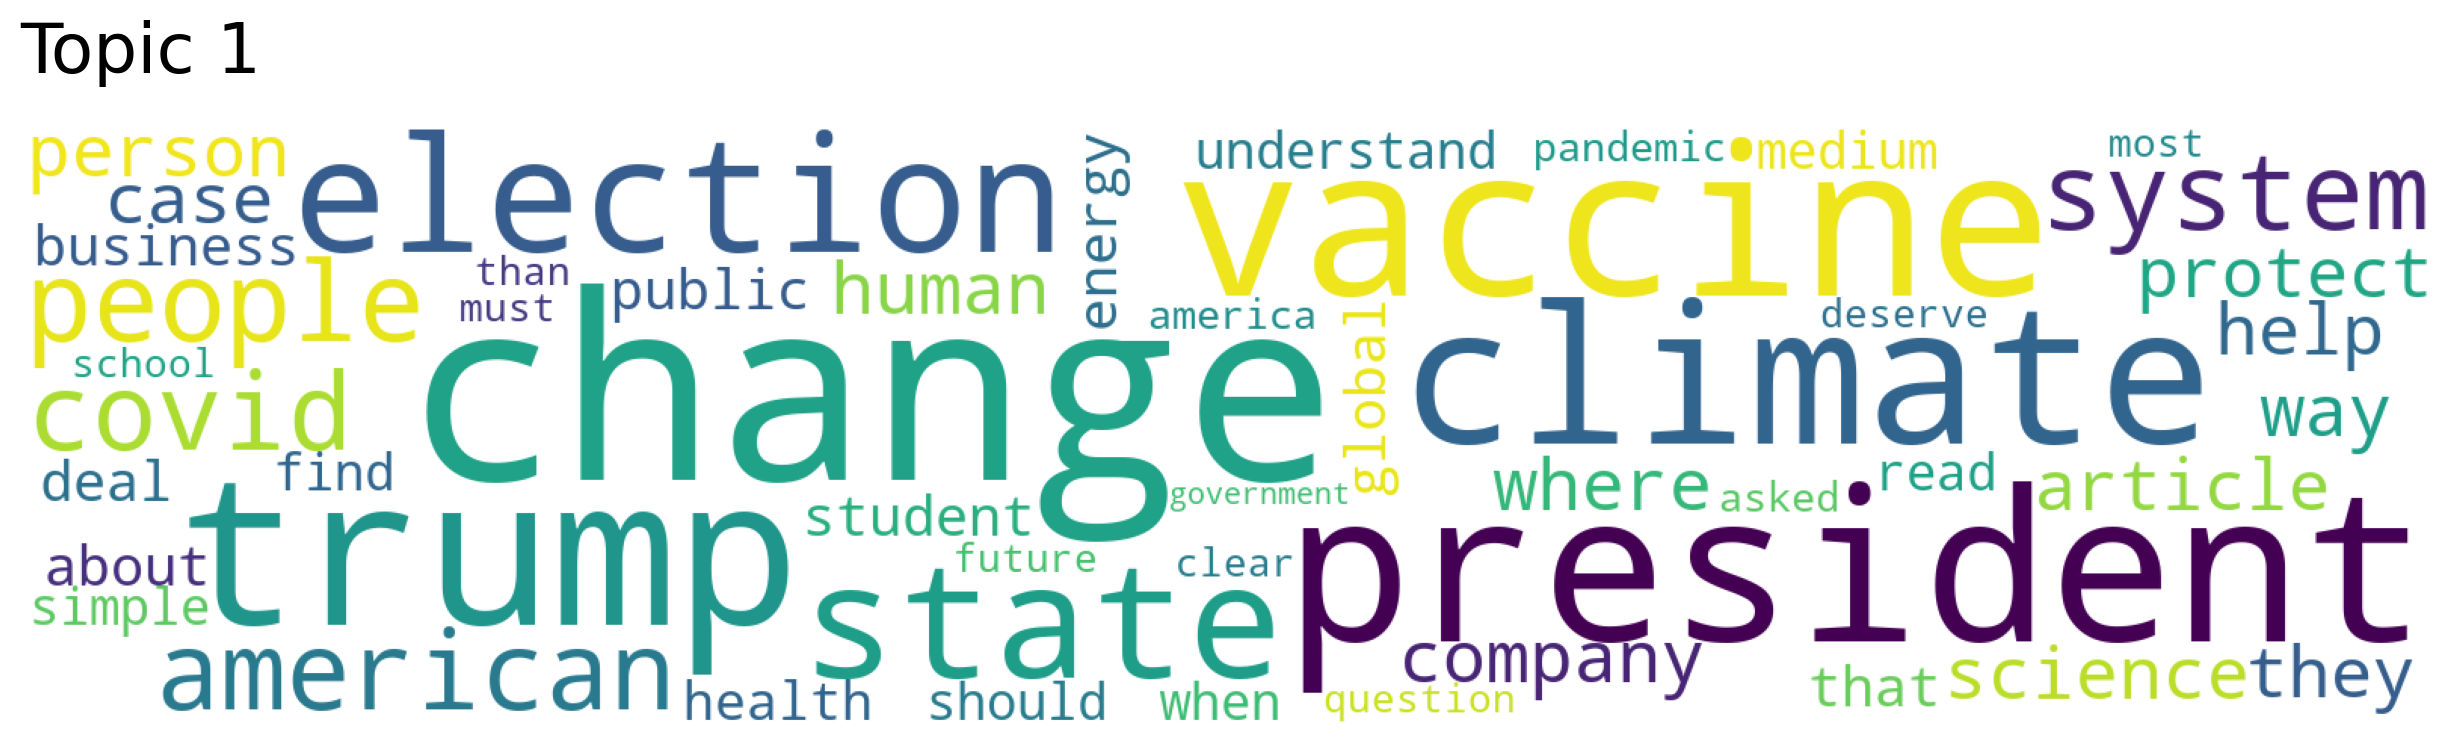

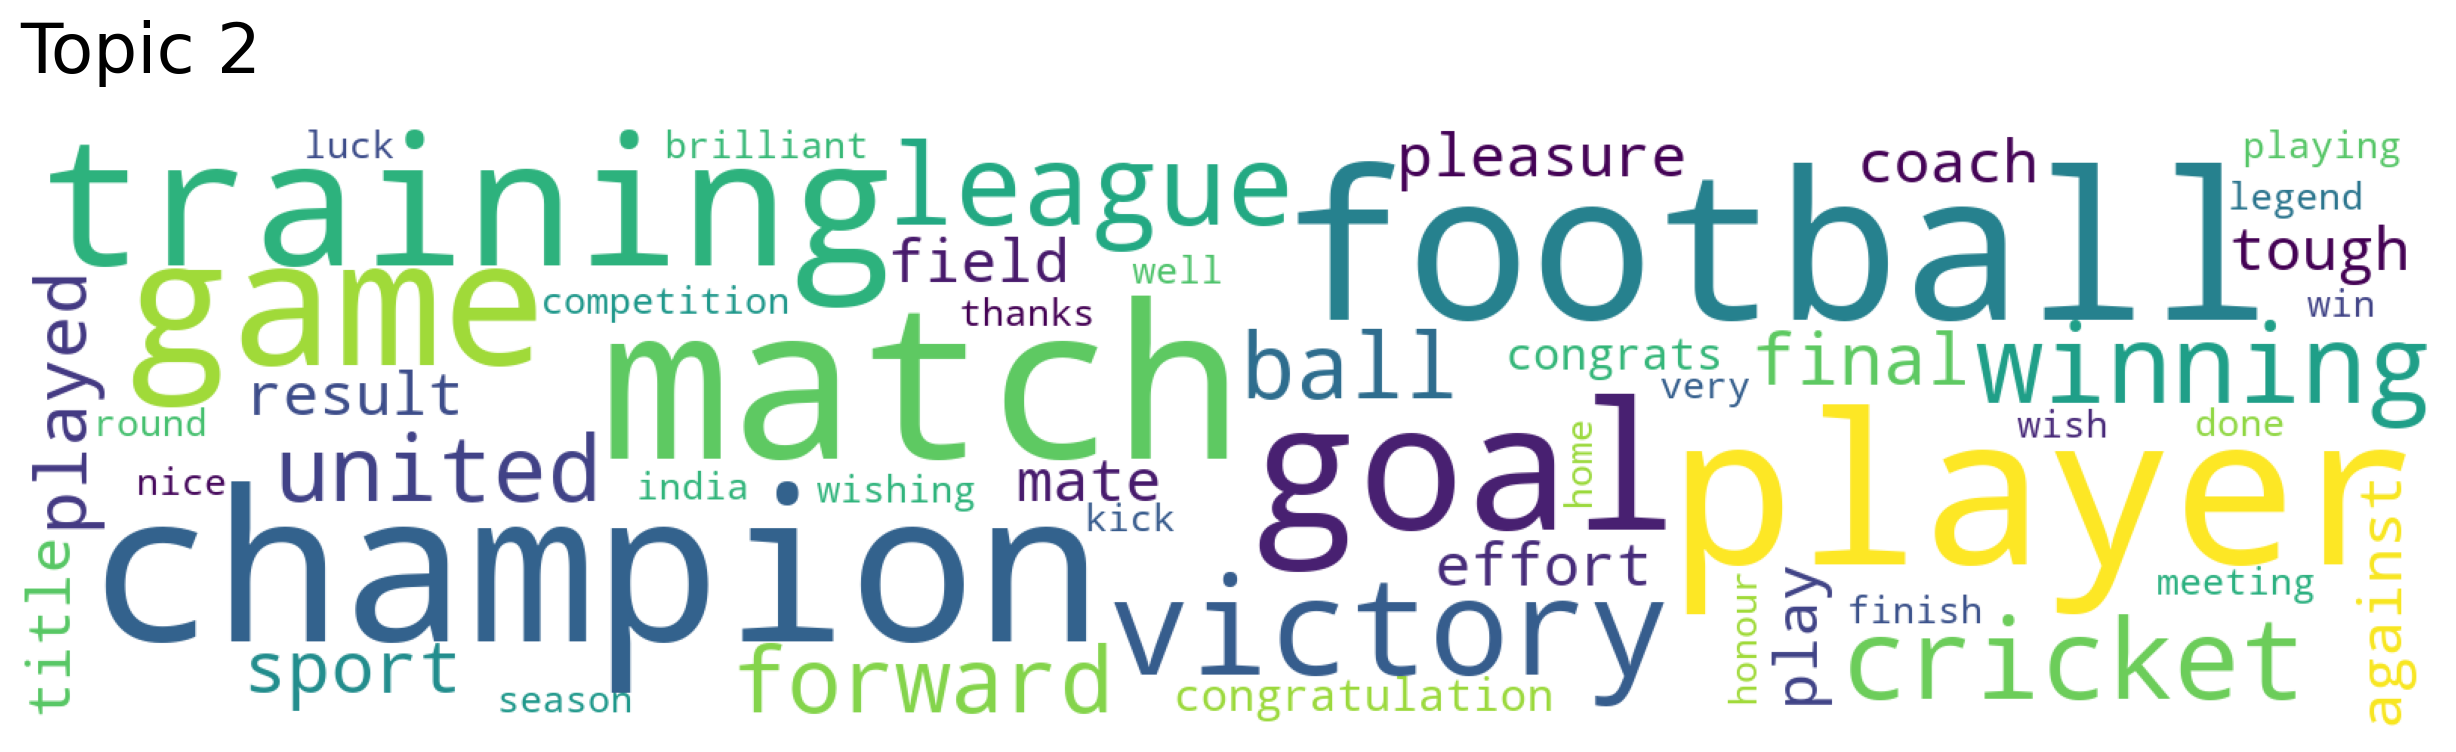

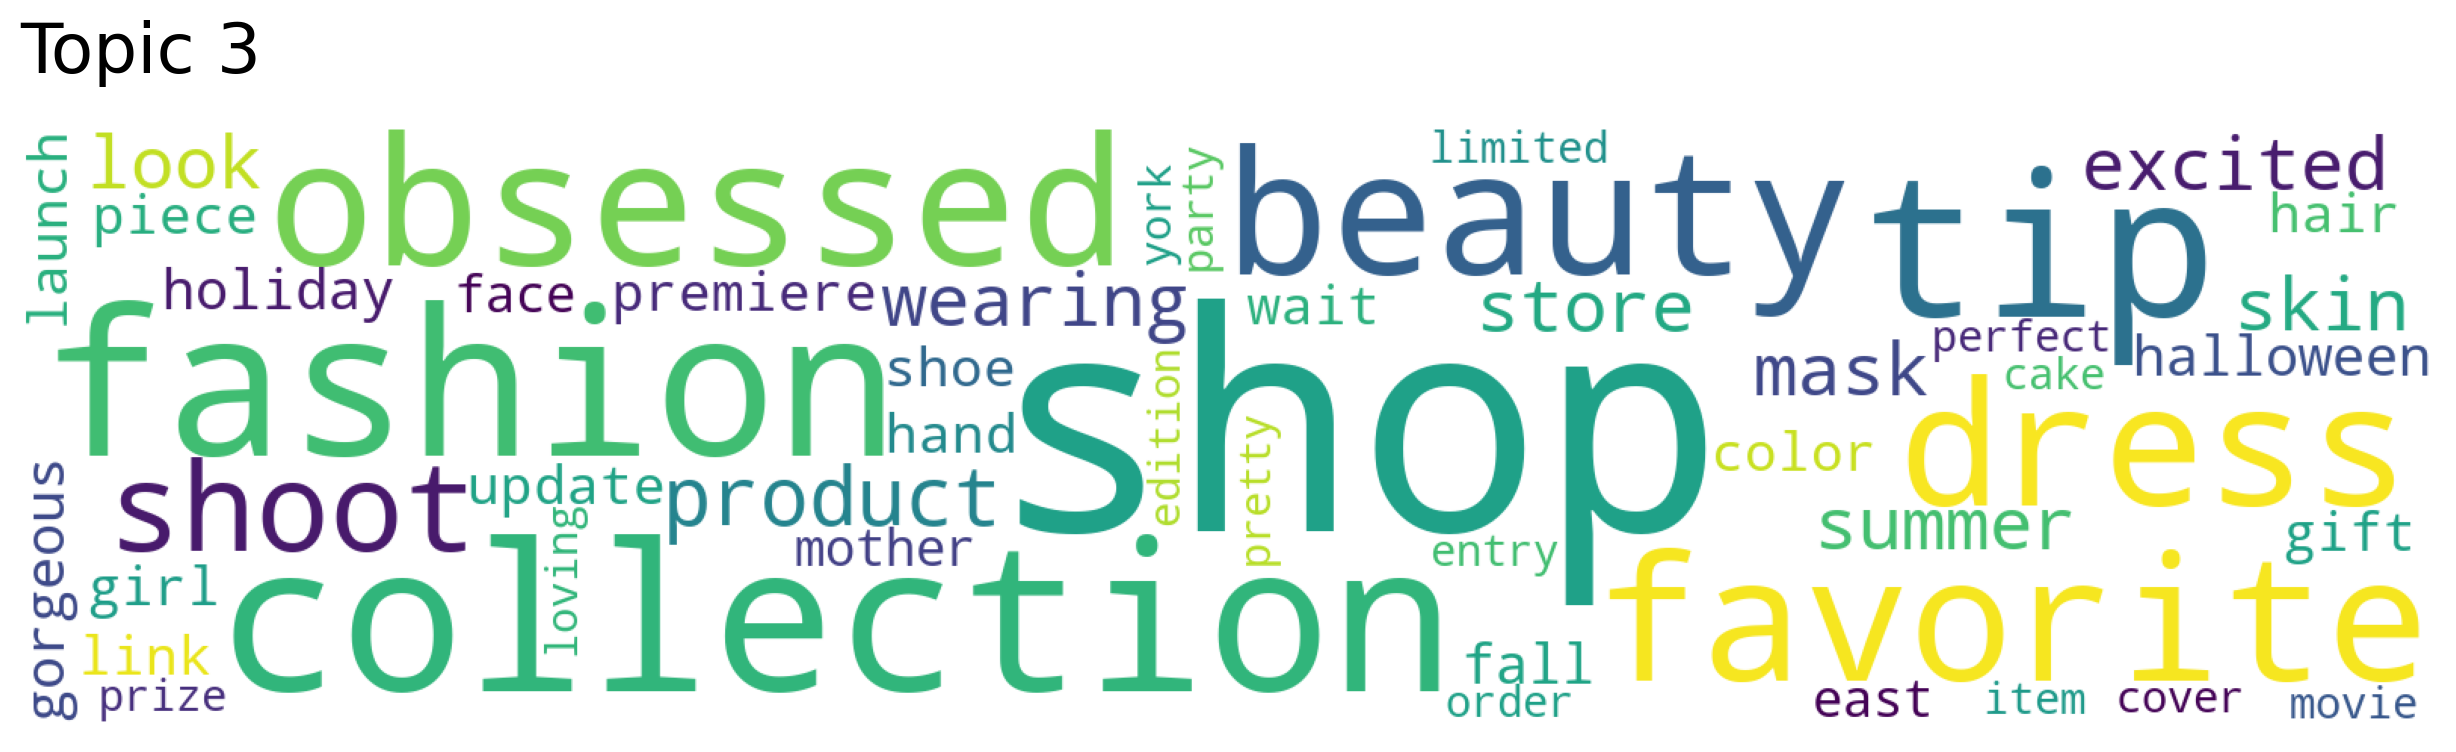

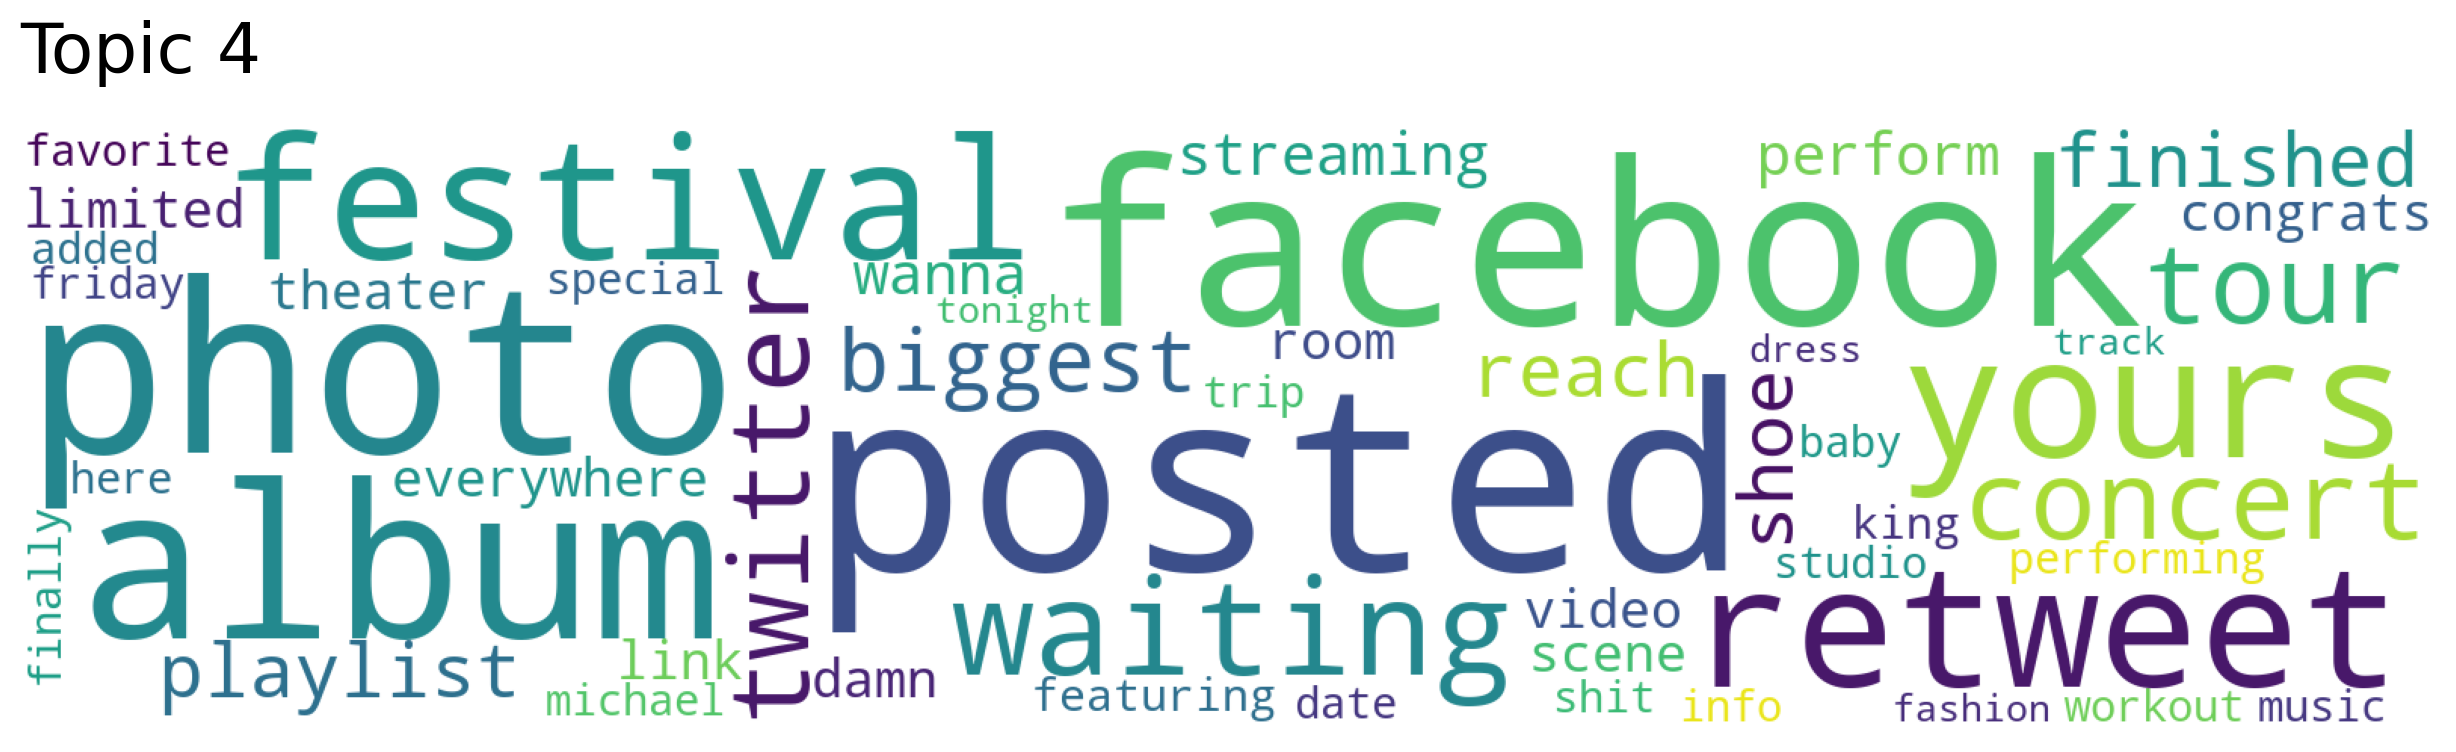

In [14]:
# Generating the Word cloud for the Topics
for topic_num in range(0,num_topcis):
  model.generate_topic_wordcloud(topic_num,background_color="white")

#####**Exploring the popularity of each Topic with respect to the Corpus**

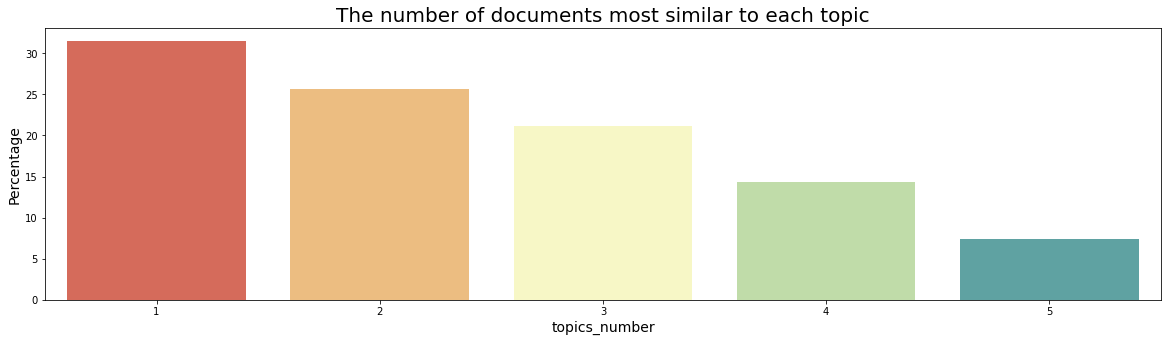

In [15]:
# Exploring the numbers of topic most similar to each topic
topic_sizes,topic_nums=model.get_topic_sizes()

plt.figure(figsize=[20,5])
sns.barplot(x=topic_nums+1,y=(topic_sizes/sum(topic_sizes)*100),palette= 'Spectral')
plt.xlabel('topics_number',fontsize=14)
plt.ylabel('Percentage',fontsize=14)
plt.title("The number of documents most similar to each topic",fontsize=16)
plt.show()

####**Mapping and Analyzing the topics with respect to the Users**

In [16]:
# Extracting the topic number for each topic  
topic_nums,topic_scores,topics_words,word_scores= model.get_documents_topics(doc_ids=docs_id, num_topics=num_topcis)


In [17]:
# Mapping the topic score with repsect to the topics 
topic_features = []
for topic_num,topic_score  in zip(topic_nums,topic_scores):
  dict_from_list = dict(zip(topic_num, topic_score))
  topic_features.append(dict_from_list)

In [18]:
# Creating the Dataframe to map the topic score with respect to documents
topic_features_train_df = pd.DataFrame(topic_features, index=docs_id)
topic_features_train_df= topic_features_train_df.sort_index(axis=1)
topic_features_train_df.columns= [f"topic_{col+1}"for col in topic_features_train_df.columns]
topic_features_train_df.head()

,topic_1,topic_2,topic_3,topic_4,topic_5
pretagil,-0.291492,-0.092447,-0.125933,0.093437,-0.161381
mirzasania,-0.033165,0.043515,0.136132,0.005216,-0.103421
parishilton,0.113673,0.049506,0.016216,0.122499,-0.010074
piersmorgan,-0.007345,0.150776,0.195376,-0.044401,-0.082137
timtebow,0.023662,0.148851,0.095937,0.000779,-0.011743


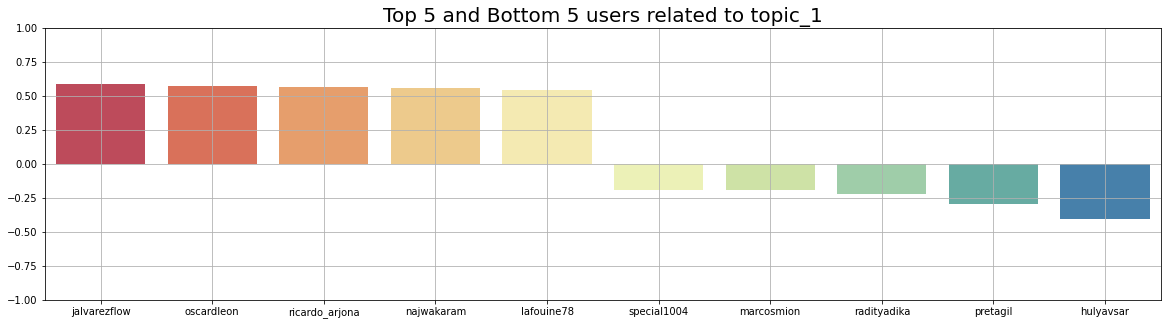

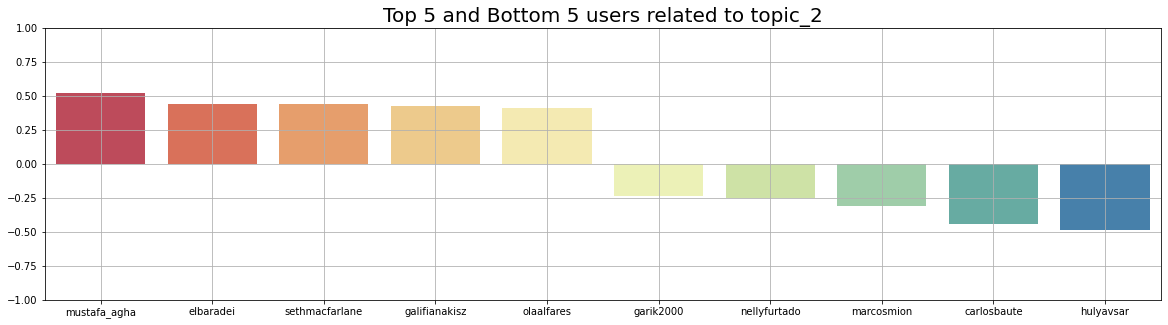

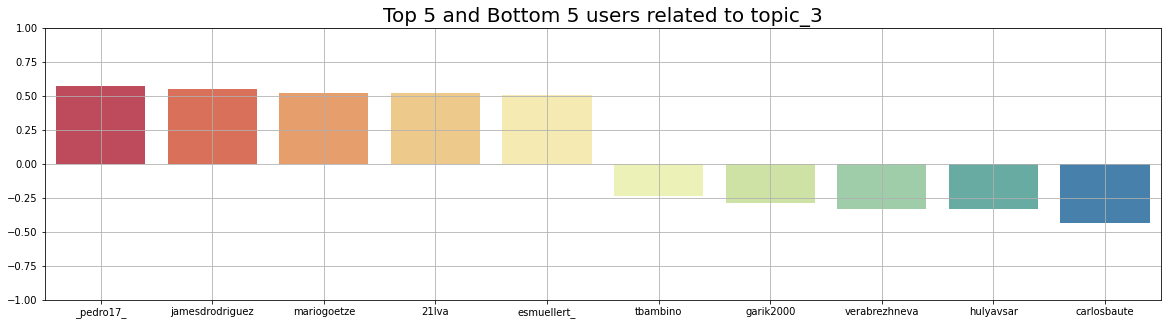

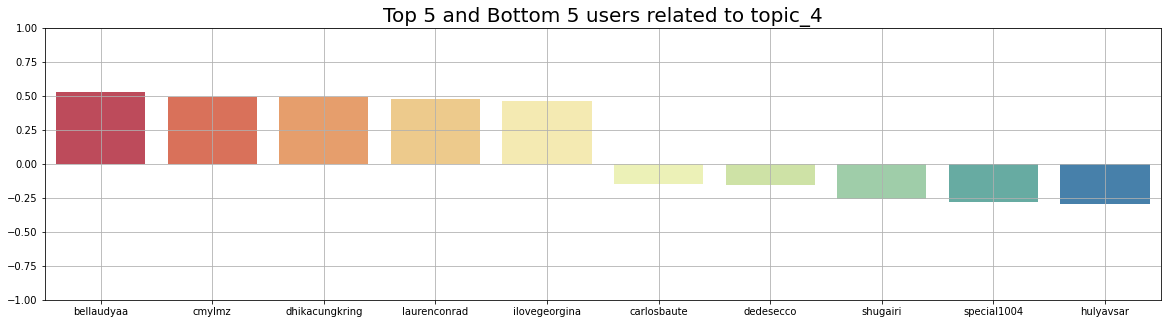

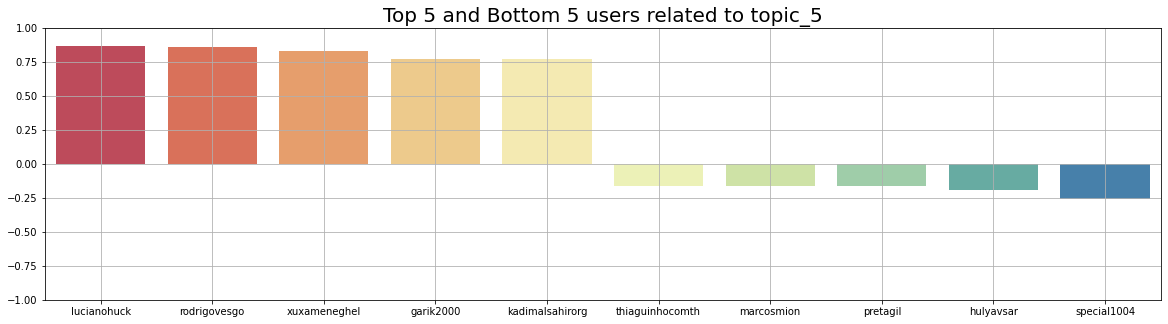

In [19]:
for col in topic_features_train_df.columns:
  # Extracting the top and bottom  user of the each topic
  sorted_data = topic_features_train_df[col].sort_values(ascending=False)
  top =sorted_data.head(5)
  bottom = sorted_data.tail(5)
  data = pd.concat([top,bottom])

  # visualising the each topic
  plt.figure(figsize=(20,5))
  sns.barplot(x=data.index,y=data.values,palette= 'Spectral')
  plt.ylim(-1,1)
  plt.title(f"Top 5 and Bottom 5 users related to {col}",fontsize=20)
  plt.grid()
  plt.show()



####**Summary**
The model helps to identify `7` distinct topic from the overall corpus of text and with the help of the vocabulary of each topic , the topics can be categories under
1. Entertainment
2. Politics
3. Sports
4. Greetings
5. Lifestyle

- The three most common topic which the user preferred to address while texting are Entertainment, Politics and Sports
- Furthermore, while exploring the topics with respect to the user, it is observed that the user texting pattern does not always align with their profession. For example Seth Woodbury MacFarlane, an American actor , texting data  very much aligned with politics. Famous Indian actor Shah Rukh Khan loves to address the topic of sports.<br/>
All this above observation concludes that the topic addressed while texting  brings a distinct  as well as significant character over texting behavior of the user.


####**Saving the results of the Topic model as Topic level feature matrix** 

In [20]:
# A new file will be created
with open('/content/drive/MyDrive/BrainStation/topic_level_feature_matrix.pkl', 'wb') as file:
    pickle.dump(topic_features_train_df, file)